# 1) Heap (hromada) data structure

- je to "complete binary tree", ktory splna "heap" vlastnosti a kde kazdy dany uzol je:
    - kazdy "parent" uzol je vacsi ako "child" uzol a "root" uzol je najvacsi. Tato vlastnost sa nazyva **max heap property**:
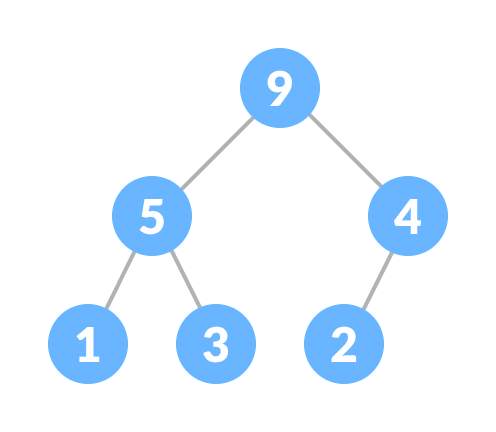

    - kazdy "parent" uzol je mensi ako "child" uzol a "root" uzol je najmensi. Tato vlastnost sa nazyva **min heap property**:
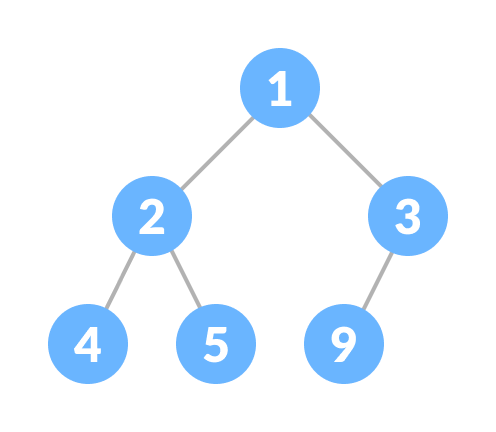

- tento typ datovej struktury nazyvame tiez **binary heap**
- vztahy pre urcenie naslednosti prvkov:
    - current = i
    - left_child_from_current = 2.i + 1
    - right_child_from_current = 2.i + 2
    - parent_from_current = (i - 1) // 2 if i != 0 
- aplikacia:
    - pouziva sa v implementacii **priority queue**
    - heap sort

## 1.1) Heap operations

### 1.1.1) Heapify

- je to proces vytvorenia "heap data structures" z "binary tree"
- pouziva sa na vytvorenie min-heap a max-heap
- postup:
    1) vstupne pole
    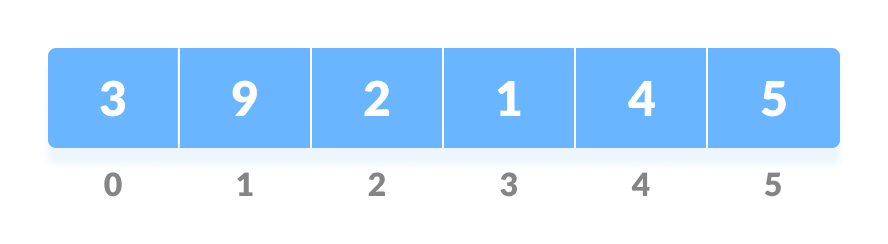
    
    2) vytvorim kompletny binary strom z pola
    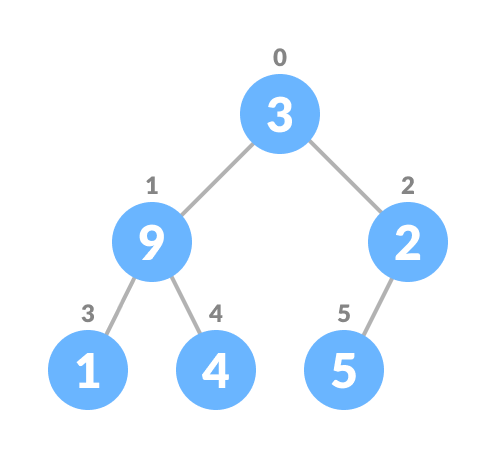
    
    3) zacinam od prveho indexu non-leaf (nelistoveho) uzla, ktoreho index je dany n/2 - 1

    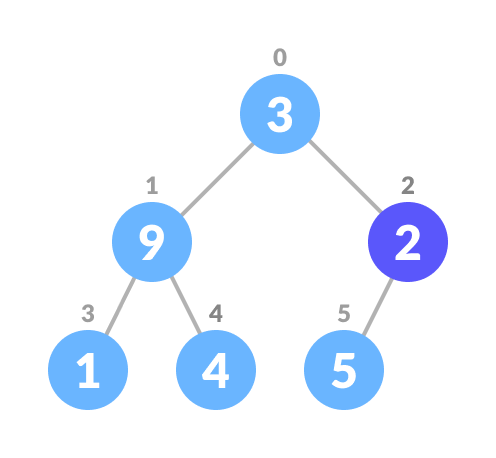
    
    4) nastavim dany prvok "currentElement" ako najvacsi
    5) index laveho "child" prvku je `2i + 1` a praveho "child" prvku je `2i + 2`
        - ak lavy child prvok "leftChild" je > ako dany prvok "currentElement" nastavim "leftChild" ako najvacsi
        - ak pravy child prvok "rightElement" je > ako ten najvacsi prvok (bud "leftChild alebo "currentElement"), tak "rightChild" nastavim ako najvacsi
    6) prehodim najvacsi prvok s "currentElement"
    7) opakujem kroky 3-7

### 1.1.2) Insert element into heap

1) vlozim novy prvok na konies stromu
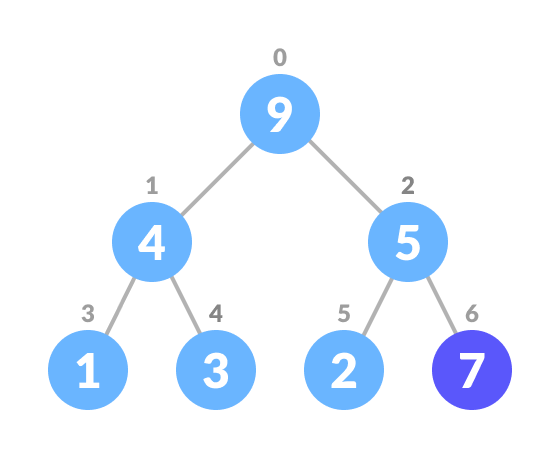

2) "heapify" strom
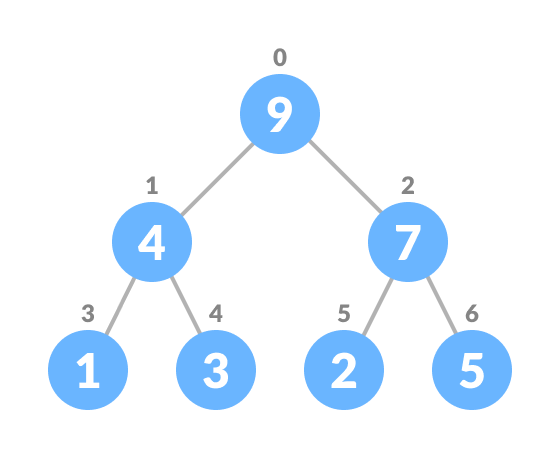

### 1.1.3) Delete element from heap

1) oznac prvok, ktory ma byt vymazany
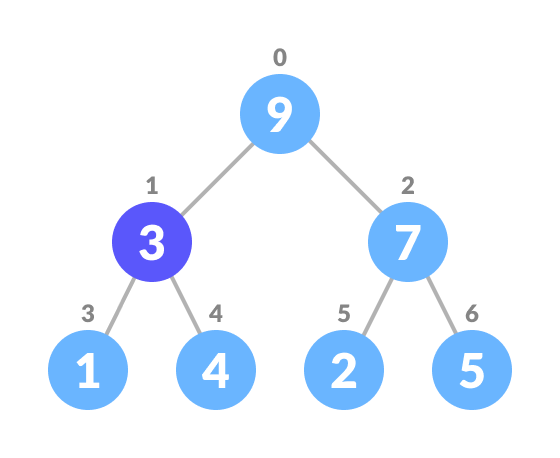

2) prehod ho s poslednym prvkom
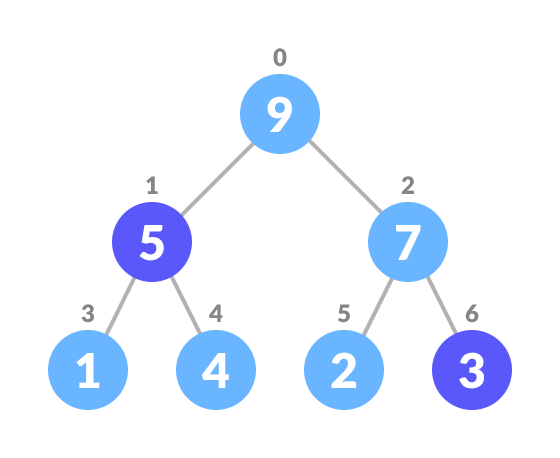

3) odstranim posledny prvok
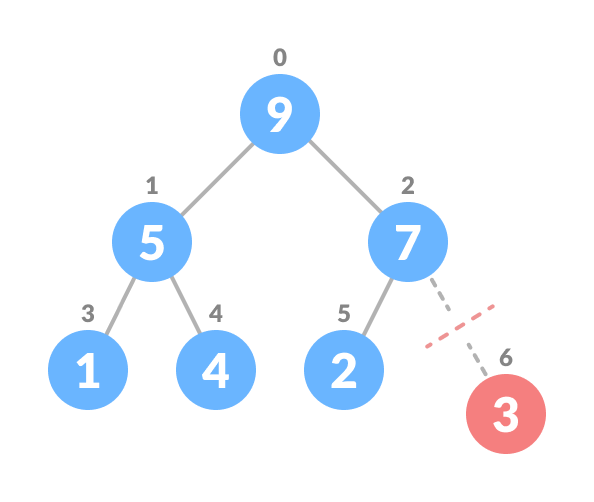

4) heapify stromu

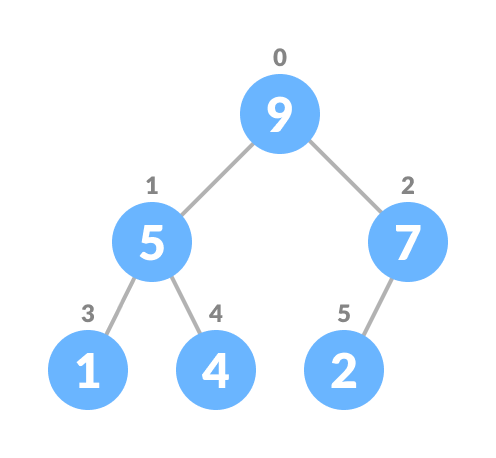

### 1.1.4) Peek (find max/min)

- peek operacie vratia max prvok z Max-heap alebo min prvok z Min-heap dsa bez zmazania prvku
- v podstate je vypisanie prveho prvku, resp. rootElement

### 1.1.5) Extract max/min

- najde a odstrani max prvok z Max-heap alebo min prvok z Min-heap
- v podstate prehodim prvy prvok s poslednym, odstranim ho a potom opat zatriedim (heapify)

In [ ]:
# max-heap data structure


# heapify
def heapify(array, size, i):
    largest = i
    leftChild = 2 * i + 1
    rightChild = 2 * i + 2
    if leftChild < size and array[leftChild] > array[largest]:
        largest = leftChild
    if rightChild < size and array[rightChild] > array[largest]:
        largest = rightChild
    if largest != i:
        array[i], array[largest] = array[largest], array[i]
        # zavolam f-iu rekurzivne
        heapify(array, size, largest)


# insert element
def insertElement(array, newNum):
    array.append(newNum)
    # usporiadam prvky
    current = len(array) - 1  # index posledneho prvku, cize prvku ktory som vlozil
    while current > 0:  # cyklus pokial je index "current" prvku viac ako 0
        parent = (current - 1) // 2  # zistim index "parent" prvku
        if (
            array[current] > array[parent]
        ):  # zistujem ci vlozeny prvok je vacsi ako jeho "parent" prvok
            # prehodim prvky ak je pravda
            array[current], array[parent] = array[parent], array[current]
            # zmenim index current na parent
            current = parent
        else:
            break


# delete element
def removeElement(array, num):
    # najdem prvok v poli/strome
    for i in range(0, len(array)):
        if array[i] == num:
            array[i], array[-1] = (
                array[-1],
                array[i],
            )  # prehodim najdeny prvok s poslednym prvkom
            array.pop()  # odstranim posledny prvok, co je vlastne prvok ktory som chcel odstranit
            break  # ak najde prvok prerusim for cyklus

    # ak index i dosiahne hodnotu max indexu pola, znamena ze prvok sa v poli nenachadza
    if i == len(array) - 1:
        print(num, "not in array")

    # spustim "heapify" pokial hladany prvok na odstranenie nebol poslednym
    if i < len(array):
        heapify(array, len(array), i)


arr = []
insertElement(arr, 3)
insertElement(arr, 4)
insertElement(arr, 9)
insertElement(arr, 5)
insertElement(arr, 2)

print("Max-heap array:", arr)

removeElement(arr, 2)
print("After deleting:", arr)

Max-heap array: [9, 5, 4, 3, 2]
After deleting: [9, 5, 4, 3]


In [ ]:
# Min-heap ako class podla neuralnine videa (https://youtu.be/wOouknH8RsY?list=PL7yh-TELLS1Gs3PjmhXTXh1FdpGg6iing)


class MinHeap:

    # konstruktor
    def __init__(self):
        self.heap = []  # vytvorenie prazdneho listu

    # len() - dlzka pola
    def __len__(self):
        return len(self.heap)

    # representation?
    # sluzi pre zobrazenie
    def __rep__(self):
        # return str(self.heap)  # vratim heap ako string
        return self.heap

    # insertion
    def insert(self, key, value):
        self.heap.append((key, value))  # vlozim novy prvok na koniec
        # sift (preosiat) - vlozeny prvok pomocou f-cie _sift_up dostanem na spravne miesto
        # v podstate ho budem porovnavat s parent prvkom, pozri _sift_up(index) f-ciu
        self._sift_up(len(self.heap) - 1)  # index posledneho prvku

    # peek_minimum
    def peek_min(self):
        # ak nie su ziadne prvky
        if not self.heap:
            raise IndexError("Empty heap")
        # inac vrati prvy prvok
        return self.heap[0]

    # extract_minimum
    def extract_min(self):
        # ak nie su ziadne prvky
        if not self.heap:
            raise IndexError("Empty heap")

        min_element = self.heap[0]  # vyberiem min prvok
        last_element = self.heap.pop()  # odstranim posledny element

        if self.heap:  # ak pole nie je prazdne
            self.heap[0] = last_element  # prvy prvok nahradim poslednym
            self._sift_down(0)  # zatriedim
        return min_element

    # heapify
    def heapify(self, array):
        self.heap = list(array)

        for i in reversed(range(self._parent(len(self.heap) - 1) + 1)):
            self._sift_down(i)

    # meld - kombinovanie heapov
    def meld(self, other_heap):
        combine_heap = self.heap + other_heap.heap
        self.heapify(combine_heap)

        other_heap.heap = []

    # pomocne f-cie
    def _parent(self, index):
        return (index - 1) // 2 if index != 0 else None

    def _left_child(self, index):
        left = 2 * index + 1
        return left if left < len(self.heap) else None

    def _right_child(self, index):
        right = 2 * index + 2
        return right if right < len(self.heap) else None

    def _sift_up(self, index):
        # swim - tak sa niekedy vola dana procedura
        # pouzivam pri insertion
        # porovnavam prvok s jeho "parent", ak je mensi ako parent, tak ich prehodim
        # pri MAx-heap to bude naopak
        parent_index = self._parent(index)

        # pokial nie je parent index = None a parent je mensi
        # self.heap[index][0] - nula je tam preto, pretoze zadavam na poziciu "index"
        # key-value prvky, cize nejaky "tuple" a potrebujem hodnotu "key"
        while parent_index != None and self.heap[index][0] < self.heap[parent_index][0]:
            # prehodim prvky
            self.heap[index], self.heap[parent_index] = (
                self.heap[parent_index],
                self.heap[index],
            )
            index = parent_index
            parent_index = self._parent(index)

    def _sift_down(self, index):
        # sink - tak sa niekedy vola dana procedura
        # pouzivam pri extract_min a heapify
        # ideme od vrchu dole
        # predpokladame, ze dany prvok je najmensi a porovnavame ho s jeho "child" prvkami
        while True:
            smallest_element_index = index
            left_child_index = self._left_child(index)
            right_child_index = self._right_child(index)

            if (
                left_child_index is not None
                and self.heap[left_child_index][0]
                < self.heap[smallest_element_index][0]
            ):
                smallest_element_index = left_child_index

            if (
                right_child_index is not None
                and self.heap[right_child_index][0]
                < self.heap[smallest_element_index][0]
            ):
                smallest_element_index = right_child_index

            # ak je index najmensieho prvku totozny s prvotnym uvazovanim
            if smallest_element_index == index:
                break

            # prehod prvky
            self.heap[index], self.heap[smallest_element_index] = (
                self.heap[smallest_element_index],
                self.heap[index],
            )

            index = smallest_element_index


# inicializacia
min_heap = MinHeap()
min_heap.heapify(
    [
        [10, "10"],
        [9, "9"],
        [8, "8"],
        [7, "7"],
        [6, "6"],
        [5, "5"],
        [4, "4"],
        [3, "3"],
        [2, "2"],
        [1, "1"],
    ]
)
min_heap.__rep__()

print(min_heap.extract_min())
print(min_heap.extract_min())
print(min_heap.extract_min())
min_heap.__rep__()

min_heap.insert(2, "2")
min_heap.__rep__()

min_heap2 = MinHeap()
min_heap2.heapify([[5, "5"], [7, "7"], [2, "2"]])
min_heap.meld(min_heap2)
min_heap.__rep__()

[1, '1']
[2, '2']
[3, '3']


[(2, '2'),
 [2, '2'],
 [5, '5'],
 [4, '4'],
 [5, '5'],
 [10, '10'],
 [8, '8'],
 [7, '7'],
 [6, '6'],
 [7, '7'],
 [9, '9']]